# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 6
label_name = "stat9"
epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [6]:

layers = [16,5,2]
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [7]:
import os

directory = "models"
if not os.path.exists(directory):
    os.makedirs(directory)


for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")


Epoch 0, Loss 6.250446200370789
Epoch 1, Loss 6.251404583454132
Epoch 2, Loss 6.243342578411102
Epoch 3, Loss 6.247864305973053
Epoch 4, Loss 6.233244776725769
Epoch 5, Loss 6.2307334542274475
Epoch 6, Loss 6.223836064338684
Epoch 7, Loss 6.233017146587372
Epoch 8, Loss 6.229676961898804
Epoch 9, Loss 6.224760413169861
Epoch 10, Loss 6.212514281272888
Epoch 11, Loss 6.221269071102142
Epoch 12, Loss 6.21220338344574
Epoch 13, Loss 6.207833707332611
Epoch 14, Loss 6.213006973266602
Epoch 15, Loss 6.2123361229896545
Epoch 16, Loss 6.214824140071869
Epoch 17, Loss 6.210000097751617
Epoch 18, Loss 6.208475053310394
Epoch 19, Loss 6.204216718673706
Epoch 20, Loss 6.18714314699173
Epoch 21, Loss 6.196170151233673
Epoch 22, Loss 6.2000702023506165
Epoch 23, Loss 6.1911919713020325
Epoch 24, Loss 6.192591488361359
Epoch 25, Loss 6.197256445884705
Epoch 26, Loss 6.1902488470077515
Epoch 27, Loss 6.192014455795288
Epoch 28, Loss 6.193531930446625
Epoch 29, Loss 6.184707462787628
Epoch 30, Loss 6.

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

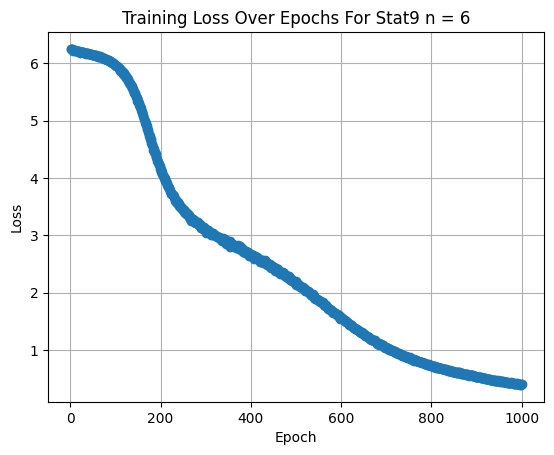

In [9]:
# Plot the training losses
plt.figure()
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title('Training Loss Over Epochs For Stat9 n = 6')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Ensure the "figures" directory exists
figures_directory = "figures"
if not os.path.exists(figures_directory):
    os.makedirs(figures_directory)

# Save the plot
plt.savefig(os.path.join(figures_directory, 'training_loss_curve_stat9_n = 6.png'))
plt.show()
plt.close()  # Explicitly close the plot to ensure it is written to the file





# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

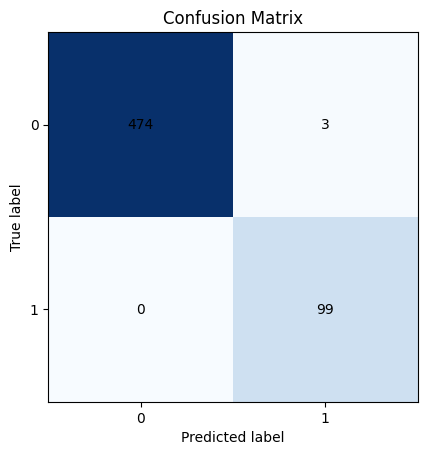

Accuracy for class 0 = 99.37106918238993%
Accuracy for class 1 = 100.0%
Overall accuracy = 99.47916666666667%


In [10]:
# TOD0
confusion_matrix = evaluate_model(model, training_dataset)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

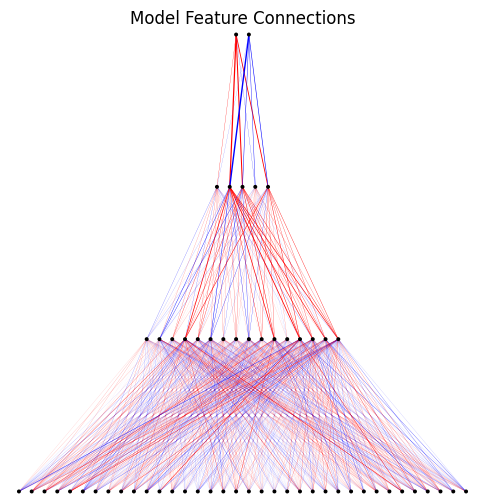

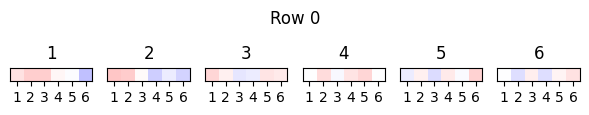

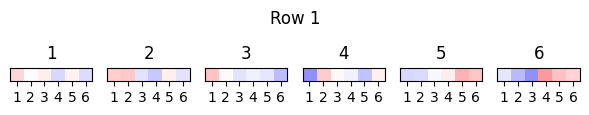

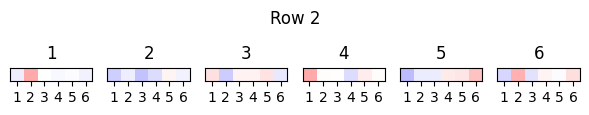

In [12]:



model.plot_connections()

model.plot_heatmap_feature(0, 0)
model.plot_heatmap_feature(0, 1)
model.plot_heatmap_feature(0,2)



